# Sympy - a deeper look

We will have a second, longer look at Sympy and its capabilities.

First, a little example with round-off errors using floating point numbers.

### Some experiments with Python number types. 

Let's start with a basic *expansive* process.   Given a number $x$ we will *double* it, 

$$x \longmapsto 2x$$

and then to keep things at a fixed scale, we will subtract whichever integer $k$ it takes so that

$$0 \leq 2x - k < 1.$$  

i.e. we consider iterating the function

$$ f(x) = 2x - \lfloor 2x \rfloor $$

$\lfloor x \rfloor$ is the largest integer less than or equal to $x$, i.e. $f(x)$ is the process
of doubling $x$, then removing the integer part.  $0 \leq f(x) < 1$ always. 

In Python:

In [3]:
def f(x):
    x = 2.0 * x
    while (x>=1.0): x = x - 1.0
    while (x<0.0): x = x + 1.0
    return x
    
## Let's consider what happens to π under f.
import math as ma
x = ma.pi
print(ma.pi)

for i in range (1, 50):
    x = f(x)
    print(x)
    

3.141592653589793
0.28318530717958623
0.5663706143591725
0.13274122871834493
0.26548245743668986
0.5309649148733797
0.061929829746759424
0.12385965949351885
0.2477193189870377
0.4954386379740754
0.9908772759481508
0.9817545518963016
0.9635091037926031
0.9270182075852063
0.8540364151704125
0.708072830340825
0.41614566068165004
0.8322913213633001
0.6645826427266002
0.32916528545320034
0.6583305709064007
0.31666114181280136
0.6333222836256027
0.26664456725120544
0.5332891345024109
0.06657826900482178
0.13315653800964355
0.2663130760192871
0.5326261520385742
0.06525230407714844
0.13050460815429688
0.26100921630859375
0.5220184326171875
0.044036865234375
0.08807373046875
0.1761474609375
0.352294921875
0.70458984375
0.4091796875
0.818359375
0.63671875
0.2734375
0.546875
0.09375
0.1875
0.375
0.75
0.5
0.0
0.0


In less than $50$ iterations, $f$ converts π to $0$.  

* * *

*Fact*: if π was represented accurately, the above sequence should *never* terminate. 

Denote $f(f(f(\cdots f(x) \cdots )))$ by $f^{(n)}(x)$, i.e. applying $f$ $n$-times, iteratively, to $x$.  

* * *

*Observation*: The only real numbers $x \in \mathbb R$ such that for some integer $n \in \{0,1,2,3,\cdots\}$ $f^{(n)}(x) = 0$ are:

$$ \{ \frac{p}{2^k} : p \in \mathbb Z, k \in \{0,1,2,3,\cdots\} \}$$

i.e. $x$ has to be a *rational* number, numerator an integer, with denominator a power of $2$. 

* * *

So even for rational numbers like $\frac{1}{3}$, the sequence $f^{(n)}(1/3)$ should never terminate at $0$.  For rational numbers this sequence turns out to be always *periodic*, for example:
$$ f(1/3) = \lfloor 2/3 \rfloor = 2/3$$
$$ f(2/3) = \lfloor 4/3 \rfloor = 1/3$$
$$ f(1/3) = \lfloor 2/3 \rfloor = 2/3$$
so the sequence $f^{(n)}(1/3)$ is $1/3, 2/3, 1/3, 2/3, \cdots $. 

*But* if we make $1/3$ a floating point number, look what happens:

In [4]:
x=1.0/3.0
for i in range (0, 55):
    x = f(x)
    print(x)
    

0.6666666666666666
0.33333333333333326
0.6666666666666665
0.33333333333333304
0.6666666666666661
0.33333333333333215
0.6666666666666643
0.3333333333333286
0.6666666666666572
0.3333333333333144
0.6666666666666288
0.33333333333325754
0.6666666666665151
0.33333333333303017
0.6666666666660603
0.3333333333321207
0.6666666666642413
0.3333333333284827
0.6666666666569654
0.3333333333139308
0.6666666666278616
0.3333333332557231
0.6666666665114462
0.3333333330228925
0.666666666045785
0.3333333320915699
0.6666666641831398
0.3333333283662796
0.6666666567325592
0.3333333134651184
0.6666666269302368
0.33333325386047363
0.6666665077209473
0.33333301544189453
0.6666660308837891
0.3333320617675781
0.6666641235351562
0.3333282470703125
0.666656494140625
0.33331298828125
0.6666259765625
0.333251953125
0.66650390625
0.3330078125
0.666015625
0.33203125
0.6640625
0.328125
0.65625
0.3125
0.625
0.25
0.5
0.0
0.0


This is one of the dangers of floating point numbers.  It can result in computation errors in a suprising array of situations.  These errors are called **round off errors**. 

In cases where you need to perform iterations like this and you are looking for *absolute* precision, Python has various other data types you could consider.  For example, the rational number data type. 

In [37]:
## fraction-safe version of f. We've turned all the numbers that were
## floats, like 2.0 and 1.0 and converted them to numbers interpreted
## as integers. The Fraction data type turns expressions such as
## Fraction(1,3) + 1 into Fraction(4,3). 
def f(x):
    x = 2 * x
    while (x>=1): x = x - 1
    while (x<0): x = x + 1
    return x

import fractions as frac
x=frac.Fraction(1,3)

for i in range (0, 5):
    x = f(x)
    print(x)
    

2/3
1/3
2/3
1/3
2/3


In [42]:
## we could also do the above with the Sympy integer class but it of course would be slower.
x = sp.Integer(1)/sp.Integer(3)
for i in range(0, 5):
    x = f(x)
    print(x)
print(type(x))

2/3
1/3
2/3
1/3
2/3
<class 'sympy.core.numbers.Rational'>


Now we have $f$ simulated accurately on our computers.  The unfortunate side-effect 
of this is that numbers like $\pi$ are not rational numbers.   Another unfortunate side-effect is that some procedures, even if they work with integers converge towards irrational numbers like $\pi$, which is difficult to approximate with fractions.  For instance, the function

$$ x \longmapsto \frac{x^2+2}{2x}$$

converges to $\sqrt{2}$ on iteration. 

In [7]:
def f(x):
    return (x**2+2)/(2*x)

x = frac.Fraction(1,1)
for i in range(6):
    x = f(x)
    print(x)

print("\nThe result approximated as a float: ", float(x))

3/2
17/12
577/408
665857/470832
886731088897/627013566048
1572584048032918633353217/1111984844349868137938112

The result approximated as a float:  1.4142135623730951


Floating point numbers are (presented as) numbers of the form $A\cdot 10^B$ where $A$ and $B$ are integers.

For example, to represent the number $$1.0324=10324 \cdot 10^{-4}$$ 
Python would store this as a pair of integers $(10324, -4)$. 

* The first integer, $10324$ is called the *significand*.  
* The second integer $-4$ is called the *exponent*.  
* $10$ is called the *base*.  

Since integers are stored with a fixed amount of system memory 
(typically one $64$-bit or $32$-bit register) they are of 
limited size. This means that floating point numbers have 
limits on what kinds of numbers they can describe. It also means that even the
addition and multiplication operation for floating point numbers are subject to 
usually small, but sometimes large errors. 

* * *

To determine how many decimal-places of precision your Python interface has, 
we compute $1.0 + 10^k$ for $k$ various negative integers.
On my laptop $k=-15$ is the limit of precision.

In [10]:
for i in range(14, 17):
    print("1.0 + 10^-",i," = ", 1.0 + pow(10,-i), sep='')

for i in range(50, 54):
    print("1.0 + 2^-", i," = ", 1.0 + pow(2,-i), sep='')

1.0 + 10^-14 = 1.00000000000001
1.0 + 10^-15 = 1.000000000000001
1.0 + 10^-16 = 1.0
1.0 + 2^-50 = 1.0000000000000009
1.0 + 2^-51 = 1.0000000000000004
1.0 + 2^-52 = 1.0000000000000002
1.0 + 2^-53 = 1.0


## Features of Sympy

The primary feature of the **Sympy** library is that it does not try to reduce expressions to floats.  It keeps the mathematics as formal/algebraic as you like, and has a reasonable amount of knowledge of how algebraic expressions can be manipulated.

The [features](http://www.sympy.org/en/features.html) of Sympy are vast and the scope of the library is changing rather quickly. It aims to be able to accomplish all forms of symbolic computation that *can* in principle be done by a computer. 

The qualifier in the above sentence is rather important. There are many basic algebraic tasks that are *non-computable*, in the sense that we have proofs that it is *impossible* to write a computer program that computes the answer to certain algebraic problems.  A closely related fact is that many differential equations do not have closed-form solutions, i.e. their solutions are not expressible in terms of [*elementary functions*](https://en.wikipedia.org/wiki/Elementary_function). 

These issues lead to certain unavoidable problems in symbolic computation.  For some tasks, Sympy has effective algorithms that give useful answers in a reliable manner.  But for other kinds of requestions, rather than give up, Sympy will *try* to answer your query, but there are *no* estimates for how long it might take, *nor* how much system memory it will require to complete the task you have asked of it.  In effect sympy may or may not give you an answer to these kinds of requests.  There is a further clas of problems where it is known no *elementary* solution exists -- so if you ask for such a solution Sympy will do nothing at all.
 

* * *

## Algebraic expressions

In [11]:
import sympy as sp

st = sp.sqrt(2) ## the square root of 2.

## Sympy has a variety of output formats
print("\nSympy has a variety of output formats including ASCII, unicode, and latex:")
sp.pprint(st, use_unicode=False)
sp.pprint(st, use_unicode=True)
print(sp.latex(st), "\n")

## Default appears to be unicode=True
sp.pprint(st)


Sympy has a variety of output formats including ASCII, unicode, and latex:
  ___
\/ 2 
√2
\sqrt{2} 

√2


$\sqrt{2}$ 

The above in a markdown cell.

In [15]:
import fractions as fr
print("\nNotice we can not use sqrt(2) in a Fraction.")
#print(fr.Fraction(st,2))

print("\nTo implement sqrt(2)/2 we would continue to use sympy.")
sp.pprint(st/2)


Notice we can not use sqrt(2) in a Fraction.

To implement sqrt(2)/2 we would continue to use sympy.
√2
──
2 


With Sympy, checking equality can be more involved than one expects.

For example, lets check if $\sqrt(2)/2$ is the same as $1/\sqrt(2)$.

but. . .

$$\frac{1}{1 + \sqrt{2}} \text{ and } \sqrt{2} - 1 $$

In [43]:
## not the way to check equality
print(1/(1+sp.sqrt(2))==sp.sqrt(2)-1)
## usually a good way. . .
sp.simplify((1/(1+st))-(st-1))

False


0

When one defines objects like $\sqrt{2}/2$ in sympy, it observes that you are dividing two objects that are powers of $\sqrt{2}$ so it simplifies both rapidly to a power of $\sqrt{2}$.  

The double equals symbol has *limited* utility for comparing sympy objects.  So please **use with care.**  Sympy only recognises objects as being *equal* when they are stored (internally) in identical syntax.  

 * Some objects, like $\sqrt{2}/2$ reduce in syntax immediately to a 'minimal representative', in this case $1/\sqrt{2}$. 
 * Other objects have no canonical minimal representative (to Sympy's knowledge) so the syntax you choose to represent your object matters. 

You can get a hint as to how useful the double equals symbol is, by determining the data type sympy is using to store your object. 

In [44]:
print("Type for sqrt(2) : "+str(type(st)))
print("Type for 1/(1+sqrt(2)) : "+str(type(1/(1+st))))
print("Type for sqrt(2)-1 : "+str(type(st-1)))

Type for sqrt(2) : <class 'sympy.core.power.Pow'>
Type for 1/(1+sqrt(2)) : <class 'sympy.core.power.Pow'>
Type for sqrt(2)-1 : <class 'sympy.core.add.Add'>


This is a *huge* **clue** as to how sympy thinks.  A sympy algebraic expression is stored internally in what is known as a **rooted tree**. 

<div style="display: inline-block; margin-right: 12px; margin-left: 50px">
<img src="tree1.png" width="150" height="150" class="alignleft" title="sqrt(2)"/></div>
<div style="display: inline-block; margin-right: 12px; margin-left: 50px">
<img src="tree2.png" width="250" height="250" class="alignleft" title="sqrt(2)-1"/></div>
<div style="display: inline-block; margin-right: 12px; margin-left: 50px">
<img src="tree3.png" width="300" height="300" class="alignleft" title="1/(1+sqrt(2))"/></div>

The **final** operation in the expression is the **base** or **root** of the tree.  When one calls the double-equal operation for sympy expressions in Python, what Python does is it checks to see if the roots are identical.  If the roots of the trees are identical, it recursively moves *up* the tree, to check if all the sub-trees are identical.  

Sympy will perform the most *elementary* simplifications automatically, such as $\frac{\sqrt{2}}{2} = \frac{1}{\sqrt{2}}$. The term *elementary* should be taken to mean the simplifications that cost Python essentially no time or processing power. Sympy only attempts this for objects where a *canonical form* is known. 

Checking equality of more complicated expressions involves more computation, quite often because there is *no* canonical form. 

The internal tree structure to a sympy object is expressible with the <a href="http://docs.sympy.org/latest/tutorial/manipulation.html">*srepr*</a> command.

In [45]:
sp.srepr(1/(1+st))

'Pow(Add(Integer(1), Pow(Integer(2), Rational(1, 2))), Integer(-1))'

## Check a function is a solution to a differential equation.

Let's apply Sympy to check if a function is a solution to an ODE.

In [48]:
x = sp.Symbol('x')
f = 1/(1 + sp.exp(-x))
fp = sp.diff(f,x)
print("f == "+str(f))
print("f' == "+str(fp)+"\n")

f == 1/(1 + exp(-x))
f' == exp(-x)/(1 + exp(-x))**2



In [49]:
print("Is f a solution to logistic de f'=f(1-f) ?: ")
print(str(f*(1-f))+" == "+str(fp)+"\n")

Is f a solution to logistic de f'=f(1-f) ?: 
(1 - 1/(1 + exp(-x)))/(1 + exp(-x)) == exp(-x)/(1 + exp(-x))**2



In [50]:
ode = fp - f*(1-f)
print("Before simplification: f'-f*(1-f) == ")
sp.pprint(ode)

Before simplification: f'-f*(1-f) == 
         1                
  1 - ───────             
           -x       -x    
      1 + ℯ        ℯ      
- ─────────── + ──────────
         -x              2
    1 + ℯ       ⎛     -x⎞ 
                ⎝1 + ℯ  ⎠ 


In [51]:
print("After simplification: ")

ode_reduced = sp.simplify(ode)
sp.pprint(ode_reduced)

After simplification: 
0


### Complex answers

In [52]:
a,b,c = sp.symbols('a b c')
f = a*x**b+c
sp.pprint(f)
af = sp.integrate(f,x)
sp.pprint(af)
## And a cute display
print("\n\n")
sp.pprint(sp.Eq(sp.Integral(f,x), af))

   b    
a⋅x  + c
  ⎛⎧log(x)  for b = -1⎞      
  ⎜⎪                  ⎟      
  ⎜⎪ b + 1            ⎟      
a⋅⎜⎨x                 ⎟ + c⋅x
  ⎜⎪──────  otherwise ⎟      
  ⎜⎪b + 1             ⎟      
  ⎝⎩                  ⎠      



                    ⎛⎧log(x)  for b = -1⎞      
⌠                   ⎜⎪                  ⎟      
⎮ ⎛   b    ⎞        ⎜⎪ b + 1            ⎟      
⎮ ⎝a⋅x  + c⎠ dx = a⋅⎜⎨x                 ⎟ + c⋅x
⌡                   ⎜⎪──────  otherwise ⎟      
                    ⎜⎪b + 1             ⎟      
                    ⎝⎩                  ⎠      


In [61]:
print(sp.srepr(af))
## you can navigate the tree using the func and args keyword
print(af.args[0].args[1])
print(af.func)

Add(Mul(Symbol('a'), Piecewise(ExprCondPair(log(Symbol('x')), Equality(Symbol('b'), Integer(-1))), ExprCondPair(Mul(Pow(Symbol('x'), Add(Symbol('b'), Integer(1))), Pow(Add(Symbol('b'), Integer(1)), Integer(-1))), S.true))), Mul(Symbol('c'), Symbol('x')))
Piecewise((log(x), Eq(b, -1)), (x**(b + 1)/(b + 1), True))
<class 'sympy.core.add.Add'>


### Let's ask Sympy to solve some ODEs

In [74]:
f=sp.Function('f')
x=sp.Symbol('x', real=True)
            
k=sp.symbols('k')
ODE = sp.Eq( sp.Derivative(f(x), x), k*f(x)**2 )

print("We wish to get sympy to solve the differential equation: ")
sp.pprint(ODE)

We wish to get sympy to solve the differential equation: 
d             2   
──(f(x)) = k⋅f (x)
dx                


In [75]:
SOL = sp.dsolve(ODE)
sp.pprint(SOL)

         -1    
f(x) = ────────
       C₁ + k⋅x


        -1  
f(x) = ─────
       x + 1
        -1  
f(x) = ─────
       x + 2
        -1  
f(x) = ─────
       x + 3
        -1  
f(x) = ─────
       x + 4


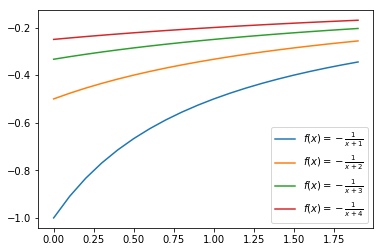

In [96]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.close()

fig, ax = plt.subplots()

## Let's plot some solution curves for a given k.
SOLk = SOL.subs([(k, 1)])

for c in range(1,5):
    SOLc = SOLk.subs([(sp.Symbol('C1'), c)])
    F = sp.lambdify(x, SOLc.args[1])
    dom = np.arange(0, 2, 0.1)
    ran = [F(p) for p in dom]
    plt.plot( dom, ran, label='$'+sp.latex(SOLc)+'$' )
    sp.pprint(SOLc)

legend = ax.legend(loc='lower right')

plt.show()

## More Generally -- Solving ODES with sympy

At present, sympy's ode solving algorithm is basically a big *cookbook*-style database of formulas.  The key computational task sympy must perform is to recognise what type of differential equation you have provided it.  

Once it recognises the form from its cookbook, it follows standard procedures, which usually amount to either computing anti-derivatives, Fourier transforms, power series, etc. 

**Sympy has algorithms to solve:**

* First order ODEs that are: 
     - separable differential equations
     - differential equations whose coefficients homogeneous of the same order.
     - exact differential equations.
     - linear differential equations
     - Bernoulli differential equations.

* Second order ODEs that are:
    - Liouville differential equations.

* n-th order ODEs that are:
    - linear homogeneous differential equation with constant coefficients.
    - linear inhomogeneous differential equation with constant coefficients using the method of undetermined coefficients.
    - linear inhomogeneous differential equation with constant coefficients using the method of variation of paramete

In [97]:
y=sp.Function('y')

sp.classify_ode( sp.Eq( y(x).diff(x) + ((3*x*y(x)+y(x)**2)/(x**2+x*y(x))), 0 ), y(x) )


('1st_homogeneous_coeff_best',
 '1st_homogeneous_coeff_subs_indep_div_dep',
 '1st_homogeneous_coeff_subs_dep_div_indep',
 'lie_group',
 '1st_homogeneous_coeff_subs_indep_div_dep_Integral',
 '1st_homogeneous_coeff_subs_dep_div_indep_Integral')

In [98]:
sp.pprint(sp.dsolve(sp.Eq( y(x).diff(x) + ((3*x*y(x)+y(x)**2)/(x**2+x*y(x))), 0 ), 
                    hint="1st_homogeneous_coeff_subs_indep_div_dep_Integral"))

            x                            x                     
           ────                         ────                   
           y(x)                         y(x)                   
            ⌠                            ⌠                     
            ⎮         -1                 ⎮       -3            
            ⎮   ─────────────── d(u₂) +  ⎮   ──────────── d(u₂)
            ⎮   2⋅u₂⋅(2⋅u₂ + 1)          ⎮   2⋅(2⋅u₂ + 1)      
            ⌡                            ⌡                     
                                                               
y(x) = C₁⋅ℯ                                                    
